# Installing the necessary libraries

In [32]:
!pip install ucimlrepo
!pip install pandas
!pip install matplotlib
!pip install seaborn

## Loading the data

In [33]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_information = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_information.data.features
y = bank_information.data.targets

# metadata
print(bank_information.metadata)

# variable information
print(bank_information.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# Data (as pandas dataframes)
X = bank_information.data.features
y = bank_information.data.targets

# Combine features and targets into one DataFrame
bank_data = pd.concat([X, pd.DataFrame(y, columns=["target"])], axis=1)


## **To know the descriptive statistics for Quantitative and Categorical features present in the dataset**

In [35]:
# Print out descriptive statistics for a selection of quantitative and categorical variables
print("Descriptive Statistics for Quantitative Variables:")
print(bank_data.describe())

Descriptive Statistics for Quantitative Variables:
                age        balance   day_of_week      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  target  
count  45211.000000  45211.000000     0.0  
mean      40.197828      0.580323     NaN  
std      100.128746      2.303441     NaN  
min       -1.000000      0.000000     NaN  
25%     

In [36]:
print("\nValue Counts for Categorical Variables:")
print(bank_data["job"].value_counts())
print(bank_data["education"].value_counts())


Value Counts for Categorical Variables:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64
secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64


## Transformation of variable

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


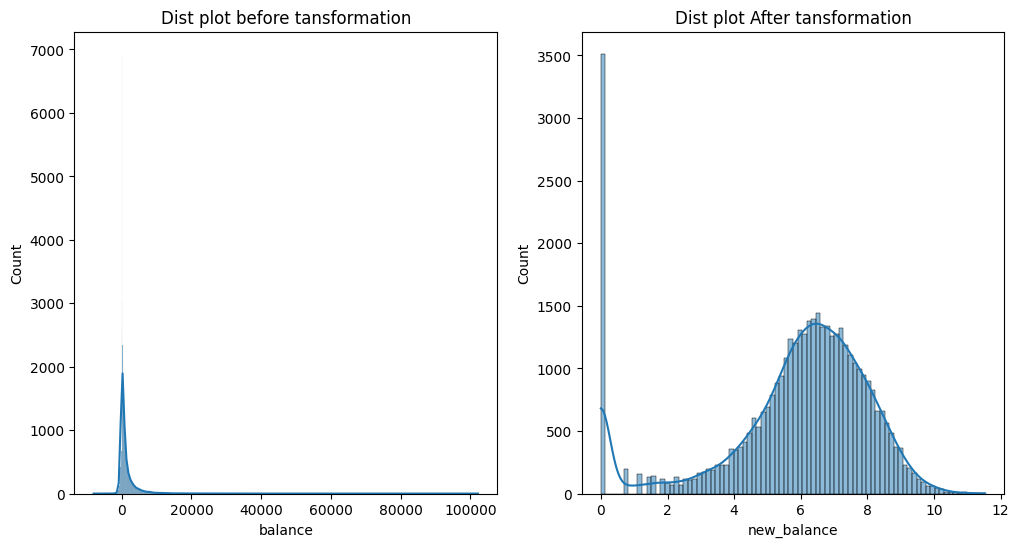

In [37]:
## looking at the description before the transformation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(bank_data['balance'], kde=True)
plt.title('Dist plot before tansformation')

bank_data['new_balance'] = np.log1p(bank_data['balance'])

plt.subplot(1, 2, 2)
sns.histplot(bank_data['new_balance'], kde=True)
plt.title('Dist plot After tansformation')


### As the balance column is left skewed I am going with the log transformation
### Log transformation of the balance column in the dataset
bank_data['new_balance'] = np.log1p(bank_data['balance'])


plt.show()


# Plotting

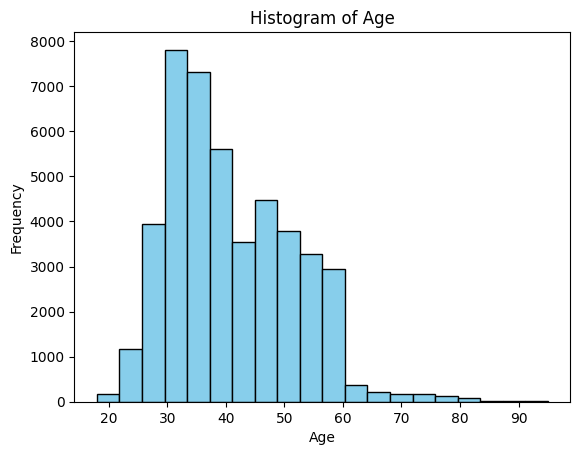

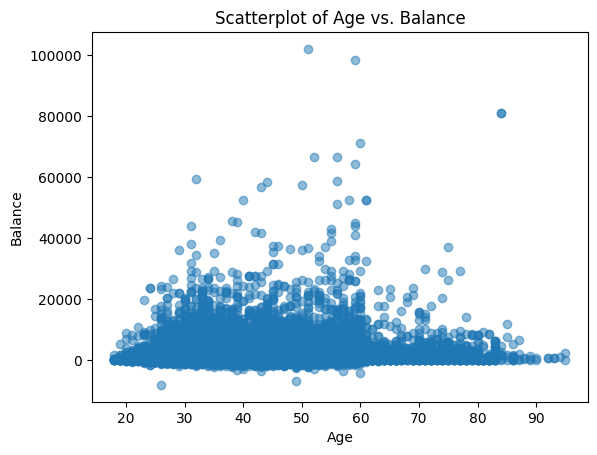

In [38]:
# Plot at least one quantitative variable (e.g., age histogram)
plt.hist(bank_data["age"], bins=20, color="skyblue", edgecolor="black")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Plot a scatterplot (e.g., age vs. balance)
plt.scatter(bank_data["age"], bank_data["balance"], alpha=0.5)
plt.title("Scatterplot of Age vs. Balance")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()